In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bell_Amundsen_Extent = pd.read_excel(filepath, sheet_name='Bell-Amundsen-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Bell_Amundsen_Extent)
fp.date_time(Bell_Amundsen_Extent)

,Extent,Date
0,1179855.894,1979-01-01
1,879585.254,1979-02-01
2,791619.096,1979-03-01
3,1254912.071,1979-04-01
4,1620142.247,1979-05-01
...,...,...
533,1556568.455,2023-06-01
534,1917507.979,2023-07-01
535,2601630.327,2023-08-01
536,2534223.780,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bell_Amundsen_Extent['Extent'] = scaler.fit_transform(Bell_Amundsen_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 11
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bell_Amundsen_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((516, 12, 1), (516,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bell_Amund_model_LT11/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.2371 - root_mean_squared_error: 0.4869

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 7s 87ms/step - loss: 0.2371 - root_mean_squared_error: 0.4869 - val_loss: 0.2197 - val_root_mean_squared_error: 0.4688
Epoch 2/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1880 - root_mean_squared_error: 0.4336

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 6s 109ms/step - loss: 0.1871 - root_mean_squared_error: 0.4326 - val_loss: 0.1864 - val_root_mean_squared_error: 0.4318
Epoch 3/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1586 - root_mean_squared_error: 0.3982

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.1550 - root_mean_squared_error: 0.3938 - val_loss: 0.1572 - val_root_mean_squared_error: 0.3965
Epoch 4/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1289 - root_mean_squared_error: 0.3590

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.1302 - root_mean_squared_error: 0.3608 - val_loss: 0.1414 - val_root_mean_squared_error: 0.3760
Epoch 5/50
43/53 [=======================>......] - ETA: 0s - loss: 0.1048 - root_mean_squared_error: 0.3238

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.1047 - root_mean_squared_error: 0.3235 - val_loss: 0.1106 - val_root_mean_squared_error: 0.3325
Epoch 6/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0851 - root_mean_squared_error: 0.2917

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0832 - root_mean_squared_error: 0.2885 - val_loss: 0.0999 - val_root_mean_squared_error: 0.3160
Epoch 7/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0660 - root_mean_squared_error: 0.2569

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0662 - root_mean_squared_error: 0.2572 - val_loss: 0.0720 - val_root_mean_squared_error: 0.2683
Epoch 8/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0503 - root_mean_squared_error: 0.2242

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0510 - root_mean_squared_error: 0.2259 - val_loss: 0.0559 - val_root_mean_squared_error: 0.2365
Epoch 9/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0397 - root_mean_squared_error: 0.1992

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0391 - root_mean_squared_error: 0.1977 - val_loss: 0.0422 - val_root_mean_squared_error: 0.2055
Epoch 10/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0324 - root_mean_squared_error: 0.1801

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0298 - root_mean_squared_error: 0.1726 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1905
Epoch 11/50
53/53 [==============================] - ETA: 0s - loss: 0.0243 - root_mean_squared_error: 0.1557

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0243 - root_mean_squared_error: 0.1557 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1526
Epoch 12/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0197 - root_mean_squared_error: 0.1403 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1623
Epoch 13/50
52/53 [============================>.] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.1291

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0166 - root_mean_squared_error: 0.1286 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1021
Epoch 14/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0135 - root_mean_squared_error: 0.1161

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0139 - root_mean_squared_error: 0.1177 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0974
Epoch 15/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0148 - root_mean_squared_error: 0.1217

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0155 - root_mean_squared_error: 0.1244 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0919
Epoch 16/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1131

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0125 - root_mean_squared_error: 0.1119 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0912
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0143 - root_mean_squared_error: 0.1195 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1024
Epoch 18/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1004
Epoch 19/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1132

INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT11\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0138 - root_mean_squared_error: 0.1177 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0893
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1082
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0109 - root_mean_squared_error: 0.1044 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1322
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1010
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0131 - root_mean_squared_error: 0.1143 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0945
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0102 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.482294754187266 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

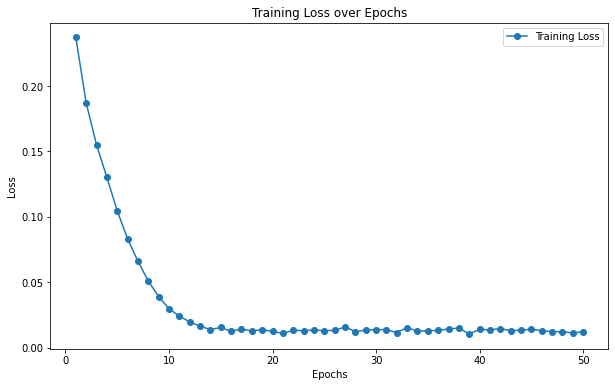

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

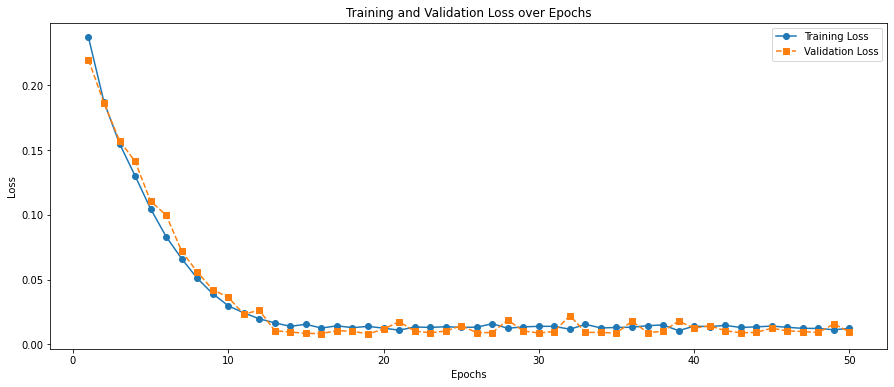

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bell_Amund_model_LT11/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.10226490063271276
MAE : 0.07956196142545248


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,3.853172e+05,439855.813
1,7.037940e+05,807857.307
2,1.062714e+06,1184280.145
3,1.462006e+06,1468308.405
4,1.803409e+06,1540851.607
5,1.905999e+06,1989099.836
6,2.031546e+06,2096990.761
7,2.026855e+06,2080961.032
8,1.723237e+06,1695704.661
9,1.318598e+06,1533888.370


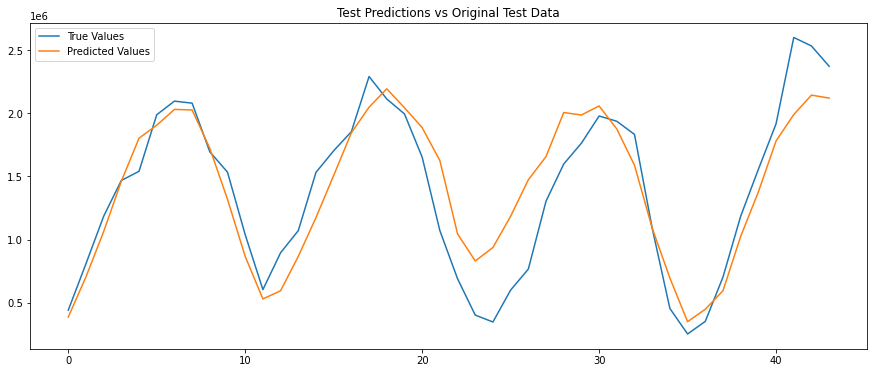

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

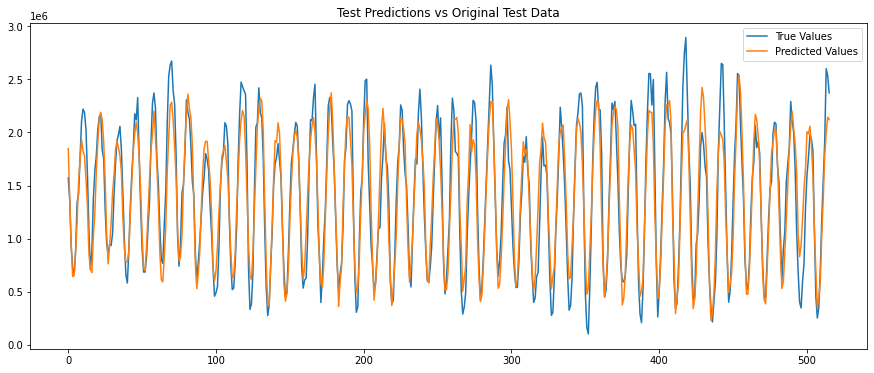

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()